# Professional Certificate in Machine Learning and Artificial Intelligence - Capstone Project

Author: Sebastian Krawczuk


## Research Paper Behind the Dataset

The dataset was created by Arvind Prasad and supervised by Shalini Chandra for their dissertation. The paper is titled: _"PhiUSIIL: A diverse security profile empowered phishing URL detection framework based on similarity index and incremental learning."_ and was published in "Computers & Security" Journal Volume 136, January 2024, 103545. It introduces a novel _PhiUSIIL_ framework for malicious website classification.

Paper DOI: https://doi.org/10.1016/j.cose.2023.103545

## PhiUSIIL Framework Summary

The framework consists of two distinct stages:
1. Calculation of URL Similarity Index (USI). 

The input URL is lexically compared to 10 million legitimate website URLs downloaded from Open PageRank Initiative - https://www.domcop.com/top-10-million-websites. USI score can be in range from `0.0` (no match) to `100.0` (100% match). Loading of the website is immediately blocked if the USI `>= 80` and `<100`. Hence strong indicator of visual-similarity attack (zero-width characters, homograph, punycode, homophone, combosquatting, etc). For example: `google-.com`. Score of `100.0` obviously indicates a valid website. If USI is `<80` then the 2nd stage is activated.

2. Incremental Learning Based Phishing URL Detection.

At this stage the website's first page is downloaded into a sandbox environment, features extracted from the URL itself, HTML code and JavaScript code. Researchers wrote a custom Java application for that. These features then are used by three independent pre-trained incremental ML algorithms to make a prediction: `BernoulliNB`, `PassiveAggressive`, and `SGDClassifier`.

The user can configure 3 security profiles:
* _Low Security Profile_: if 1 out of 3 models qualify the website as legitimate it is reported as such.
* _Medium Security Profile_: if 2 out of 3 models qualify the website as legitimate it is reported as such.
* _High Security Profile_: if 3 out of 3 models qualify the website as legitimate it is reported as such.

## The Dataset

The dataset was found at and downloaded from: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

The dataset was built by the _PhiUSIIL_ researchers by actively monitoring _PhishTank_, _OpenPhish_ and _MalwareWorld_ services. That way they downloaded the malicious content before it can potentially disappear (usually cyber attack campaigns do not last long). They collected over 100,000 phishing websites from October 2022 until May 2023. The same technique was used to also identify and download over 100,000 legitimate websites.

As the end result, PhiUSIIL Phishing URL dataset contains `134,850` legitimate and `100,945` phishing URLs. Features were extracted from the URL, HTML and JavaScript source code of the webpage. 

Additional features were derived from the existing features. They include for example: `CharContinuationRate`, `URLTitleMatchScore`, `URLCharProb`, and `TLDLegitimateProb`.

In total, there is 54 features / variables and one URL classification label for supervised learning.

The data was donated to the general public on 3/3/2024 under [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license.

#### Additional Variable Information

- Column "FILENAME" can be ignored.
- Class Labels: Label 1 corresponds to a legitimate URL, label 0 to a phishing URL.

## Features (Copied From the Publication)

### Features extracted from the URL
 - **TLD** - Top Level Domain. `.com` or `.edu`.
 - **URLLength** - length of URL. Phishing URLs are often longer than legitimate URLs.
 - **IsDomainIP** - IP address instead of a domain name can be a red flag for users.
 - **NoOfSubDomain** - Cyber criminals often use visual similarity techniques to trick users. They create subdomains that look like subdomain of legitimate websites.
 - **NoOfObfuscatedChar** -  Count of obfuscated characters in URL. Obfuscated URL `https://abc.com%6d` opens `https://abc.comm` and obfuscated URL `https://facebook.com@%61%62%63.%43%4F%4D` opens `https://abc-.com` and try to login `https://abc.com`.
 - **IsHTTPS** - Does URL use HTTPS or plaintext HTTP?
 - **NoOf[Degits | Equals | QMark | Ampersand | OtherSpecialChars ]** - A large number of digits or symbols such as `=`, `?`, `&` or `%` in a URL increases the possibility of being a phishing URL.

### Features extracted from the HTML content
 - **LargestLineLength** - Cyber criminals may use encrypted text to hide the actual code from the user. A longer single line of code may indicate code obfuscation.
 - **HasTitle** - Missing title tag may indicate a phishing page.
 - **HasFavicon** -  Missing a favicon tag may indicate a phishing scam.
 - **IsResponsive** - Most legitimate websites are responsive, which helps web content to be appropriately adapted across devices to give better readability and view. Fortunately, many phishing websites are not responsive, as threat actors find it challenging to ensure the responsiveness of their quickly designed websites on all major devices.
 - **NoOfURLRedirect** - Phishing sites may use redirects to fool users to a different page. HTML code may contain JavaScript or meta tags that redirect users to a different URL. The HTML tags such as `http-equiv`, `refresh`, `window.location`, `window.location.replace`, `window.location.href`, `http.open` can help identify URL redirection.
 - **HasDescription** -  Legitimate websites provide page descriptions with `description` meta name. Missing page descriptions may raise a red flag for a webpage.
 - **NoOfPopup**, **NoOfiFrame** - Phishing websites may use pop-ups or `iframe` to distract users and capture sensitive information.
 - **HasExternal**, **FormSubmit** - Phishing sites often use HTML forms to collect user information. Form submitting to an external URL can be a red flag.
 - **HasCopyrightInfo**, **HasSocialNet** - Most legitimate websites have copyright and their social networking information. Missing such information may indicate a phishing scam.
 - **HasPasswordField**, **HasSubmitButton** -  HTML allow users to input data and submit it to other URLs.
 - **HasHiddenFields** - Phishing websites may use hidden fields to capture sensitive information without the user’s knowledge.
 - **NoOfImage** - Threat actors can use screenshots of legitimate websites and design phishing websites to make them appear more legitimate. More images used in respectively small websites may indicate phishing websites.
 - **NoOfJS** - JavaScript (JS) is a programming language embedded in HTML to create interactive webpages. A large number of JavaScript included in a webpage can make it suspicious.
 - **NoOfSelfRef**, **NoOfEmptyRef**, **NoOfExternalRef** - Hyperlinks (`href`) are clickable links that allow users to navigate between webpages or navigate to external webpages. A large number of hyperlinks navigating to itself, navigating to empty links, or navigating to external links can be suspicious.

### Derived features
- **CharContinuationRate** - indicates how a URL contains letters, digits, or special characters. CharContinuationRate is the longest letter, digits, and special character sequence divided by total URL length. URLs such as www.abc.com, www.abc123.com, or www.abc_123.com will give same CharContinuationRate value. However, URLs such as www.a1b2c3.com or www.a1_b-_2.com get lower CharContinuationRate.
- **URLTitleMatchScore** - Cybercriminals often use social engineering tactics to trick users into believing a website is legitimate. They may use a URL that looks similar to a legitimate website and create a convincing webpage title reflecting the website’s content. We introduced URLTitleMatchScore to identify the discrepancy between the URL and the webpage title. A lower score can be a sign that the website is a phishing attempt because the webpage title does not match the content that is expected to be found on the website. A higher score 100 or close to 100 indicates that the website is what it claims to be.
- **URLCharProb** - While most legitimate URLs look meaningful, many phishing URLs contain random letters, digits, and misspelled words that do not look meaningful. Often, an attacker uses the typosquatting technique to create a URL similar to a legitimate URL but with small typographical errors. To understand the pattern of each letter and digit in a URL, we count the occurrence of each leter and digit in the 10 million legitimate URLs and divide them by the total count of all letters and digits of 10 million legitimate URLs. Further, to compare it with the pattern of phishing URLs, we collected 7 million phishing URLs and calculated the probability of each letter and digit using the same method. Most of the letters such as a, c, e, o, r, and t are more frequently used in legitimate URLs, while letters such as b, f, q, v, w, x, y, z, and all the digits are more frequent in phishing URLs.
- **TLDLegitimateProb** - Phishing attackers often use TLDs that are uncommon or unrelated to the purpose of the website they are trying to spoof. Legitimate websites often use specific TLDs associated with their industry or location. We extracted all the TLDs from the top 10 million websites and counted the occurrence of each TLD. Further, we calculated the ratio of each TLD by dividing the total occurrence of that TLD by the total occurrence of all the TLDs. A higher `TLDLegitimateProb` of a URL may indicate a legitimate URL, and a lower `TLDLegitimateProb` value may help identify phishing URLs.



## Import Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn Modules
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## Set Global Options

In [2]:
# To display scikit-learn Pipeline stages as diagrams.
sklearn.set_config(display = 'diagram')

# Display Pandas float values in decimal format rather than scientific. 
pd.options.display.float_format = '{:.2f}'.format

## Load the Data

In [3]:
df = pd.read_csv('data/PhiUSIIL_Phishing_URL_Dataset.csv')

# Drop FILENAME column as indicated by the authors.
df.drop(columns = ['FILENAME'], inplace = True)

## Exploratory Data Investigation (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [5]:
df.shape

(235795, 55)

### Data Quality

#### Check Few URLs For Accuracy

In [6]:
# groupby() will stratify output by label.
df.groupby(by = 'label').sample(n = 5, random_state = 0)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
8977,http://www.saiconsard.co.jp.mfouei.top/ai/sign...,50,www.saiconsard.co.jp.mfouei.top,31,0,top,36.92,0.48,0.00,0.06,...,0,0,0,0,0,0,0,0,0,0
229909,https://hrcnlnexzi.web.app/,26,hrcnlnexzi.web.app,18,0,app,48.67,0.79,0.00,0.05,...,0,0,0,0,0,0,0,0,3,0
94739,http://www.drkko.com,19,www.drkko.com,13,0,com,85.76,1.00,0.52,0.06,...,0,0,0,0,0,1,1,0,1,0
146590,http://www.allterdsmatter.com,28,www.allterdsmatter.com,22,0,com,77.58,1.00,0.52,0.06,...,0,0,0,0,0,1,1,0,1,0
158183,http://www.hbah.com,18,www.hbah.com,12,0,com,87.15,1.00,0.52,0.05,...,0,0,0,0,0,0,0,0,0,0
27469,https://www.portalradios.com.br,30,www.portalradios.com.br,23,0,br,100.00,0.81,0.01,0.06,...,0,0,1,51,3,7,85,4,8,1
175798,https://www.lagasta.com,22,www.lagasta.com,15,0,com,100.00,1.00,0.52,0.07,...,0,0,1,25,8,18,60,3,69,1
154335,https://www.fulminiesaette.it,28,www.fulminiesaette.it,21,0,it,100.00,1.00,0.01,0.06,...,0,0,1,91,10,10,205,0,207,1
108251,https://www.polandww2.com,24,www.polandww2.com,17,0,com,100.00,1.00,0.52,0.05,...,0,0,1,45,5,24,74,0,29,1
120893,https://www.ocweekly.com,23,www.ocweekly.com,16,0,com,100.00,1.00,0.52,0.06,...,0,0,0,20,18,26,93,1,101,1


Crosscheck URLs considered as phishing with phishtank.org:
 - http://www.saiconsard.co.jp.mfouei.top/ai/sign.php - found
 - https://hrcnlnexzi.web.app/ - found
 - http://www.drkko.com	- not found
 - http://www.allterdsmatter.com - not found
 - http://www.hbah.com - not found

Crosscheck URLs considered as legitimate with phishtank.org:
 - https://www.portalradios.com.br - not found
 - https://www.lagasta.com - not found
 - https://www.fulminiesaette.it - not found
 - https://www.polandww2.com - not found
 - https://www.ocweekly.com	- not found

Surpassingly 3 of out 5 sampled phishing URLs were not found with phishtank.org(?!). We would need to check more URLs (if not all) classified as phishing with phishing URL data providers that the authors claimed they used. 

#### Missing Values and Duplicates

In [7]:
df.isna().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

In [8]:
df.duplicated().sum()

0

As the authors stated, there are no missing values and no duplicates. There's no data cleaning required then.

**Note: This is not true, more on that later.**

### Data Analysis

There are only 3 types of data: 
 - `string` (4) - Target URL and its decomposed intermediate parts and elements.
 - `integer` (41) - Lengths of URL and HTML as well as `0`/`1` encoded boolean values for `false` / `true` features.
 - `float` (10) - derived features with with probabilities or ratios.

#### String Features 

In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
URL,235795,235370,https://disclosepack.myportfolio.com/,2
Domain,235795,220086,ipfs.io,1197
TLD,235795,695,com,112554
Title,235795,197874,0,32719


This is weird!? URL entries should be unique. Let's investigate it.

In [10]:
df.query('URL == "https://disclosepack.myportfolio.com/"')

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
97557,https://disclosepack.myportfolio.com/,37,disclosepack.myportfolio.com,28,0,com,70.36,0.54,0.52,0.06,...,0,0,0,0,0,0,0,0,0,0
221720,https://disclosepack.myportfolio.com/,36,disclosepack.myportfolio.com,28,0,com,70.36,0.54,0.52,0.06,...,0,0,0,0,0,0,0,0,0,0


In [11]:
len('https://disclosepack.myportfolio.com/')

37

It looks like two identical URL entries are off by one `URLLength` value causing them to be invisible duplicates. Perhaps coding error by the original authors?!

Let's see if there is more duplicate URLs perhaps?

In [12]:
value_counts = df['URL'].value_counts()
duplicated_urls = value_counts[value_counts > 1]
duplicated_urls = duplicated_urls.index
df_of_dup_urls = df[df['URL'].isin(duplicated_urls)].sort_values(by = 'URL')

In [13]:
df_of_dup_urls.head(6)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
219489,http://2f3a.reicrut-chat.workers.dev/,37,2f3a.reicrut-chat.workers.dev,29,0,dev,27.90,0.36,0.00,0.05,...,1,0,0,0,0,0,0,0,0,0
57609,http://2f3a.reicrut-chat.workers.dev/,36,2f3a.reicrut-chat.workers.dev,29,0,dev,27.90,0.36,0.00,0.05,...,1,0,0,0,0,0,0,0,0,0
227564,http://34.149.138.117/,21,34.149.138.117,14,1,117,38.23,0.40,0.00,0.00,...,0,1,0,4,1,5,48,0,9,0
27166,http://34.149.138.117/,22,34.149.138.117,14,1,117,38.23,0.40,0.00,0.00,...,0,1,0,4,1,4,48,0,9,0
147448,http://595221.selcdn.ru/qwerty-ohdhdjejnnad-na...,62,595221.selcdn.ru,16,0,ru,27.44,1.00,0.02,0.04,...,0,0,1,2,2,7,0,0,3,0
189978,http://595221.selcdn.ru/qwerty-ohdhdjejnnad-na...,63,595221.selcdn.ru,16,0,ru,27.44,1.00,0.02,0.04,...,0,0,1,2,2,7,0,0,3,0


In [14]:
df_of_dup_urls.shape

(850, 55)

In [15]:
df_of_dup_urls['label'].value_counts()

label
0    850
Name: count, dtype: int64

We have 850 duplicate URLs. At first sight, it like like `URLLength` calculation by the dataset authors is wrong and causes the duplicates. For each duplicated `URL` entry `URLLength` value is off by 1.

Also, all of these duplicates are phishing URLs.

Could they be cleaned by just recalculating `URLLength`? Let's take one sample of duplicated URL and check by which columns are the two entries different. 

In [16]:
df_2_URLs = df.query('URL == "http://2f3a.reicrut-chat.workers.dev/"')

row1 = df_2_URLs.iloc[0]
row2 = df_2_URLs.iloc[1]

differences = row1 != row2
different_columns = differences[differences].index.tolist()
different_columns

['URLLength',
 'LetterRatioInURL',
 'DegitRatioInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL']

We would need to recompute 5 features for the duplicated URLs. At least in this one isolated example. Who knows how other URLs are different and by what columns? `URLLength` is trivial to recalculate but the other features require access to original authors's data and procedures to do this right. This is beyond the scope of this exercise.

I suggest we drop these 850 duplicates.

In [17]:
# Drop duplicated URLs
df.drop(index = df_of_dup_urls.index, inplace = True)
df.shape

(234945, 55)

#### Integer Features

In [18]:
df.describe(include = 'int').T

,count,mean,std,min,25%,50%,75%,max
URLLength,234945.00,34.52,41.35,13.00,23.00,27.00,34.00,6097.00
DomainLength,234945.00,21.44,9.10,4.00,16.00,20.00,24.00,110.00
IsDomainIP,234945.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
TLDLength,234945.00,2.76,0.60,2.00,2.00,3.00,3.00,13.00
NoOfSubDomain,234945.00,1.17,0.60,0.00,1.00,1.00,1.00,10.00
HasObfuscation,234945.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
NoOfObfuscatedChar,234945.00,0.02,1.88,0.00,0.00,0.00,0.00,447.00
NoOfLettersInURL,234945.00,19.38,29.11,0.00,10.00,14.00,20.00,5191.00
NoOfDegitsInURL,234945.00,1.87,11.90,0.00,0.00,0.00,0.00,2011.00
NoOfEqualsInURL,234945.00,0.06,0.94,0.00,0.00,0.00,0.00,176.00


There are a few areas of concern here. For example: `LargestLineLength`, `LineOfCode`, `NoOfPopup`, `NoOfiFrame`. These features have extreme cases of outliers. Min and 75% quartile are all `0.0` and then a really high max value.  

#### Float Features

In [19]:
df.describe(include = 'float').T

,count,mean,std,min,25%,50%,75%,max
URLSimilarityIndex,234945.00,78.56,28.92,0.16,57.31,100.00,100.00,100.00
CharContinuationRate,234945.00,0.85,0.22,0.00,0.68,1.00,1.00,1.00
TLDLegitimateProb,234945.00,0.26,0.25,0.00,0.01,0.08,0.52,0.52
URLCharProb,234945.00,0.06,0.01,0.00,0.05,0.06,0.06,0.09
ObfuscationRatio,234945.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
LetterRatioInURL,234945.00,0.52,0.12,0.00,0.43,0.52,0.59,0.93
DegitRatioInURL,234945.00,0.03,0.07,0.00,0.00,0.00,0.00,0.68
SpacialCharRatioInURL,234945.00,0.06,0.03,0.00,0.04,0.05,0.08,0.40
DomainTitleMatchScore,234945.00,50.30,49.68,0.00,0.00,80.00,100.00,100.00
URLTitleMatchScore,234945.00,52.27,49.59,0.00,0.00,100.00,100.00,100.00


### Univariate Analysis

In [20]:
# Mapping table for 'label' classification column for describing plots or reports
url_classification_labels_list = ['Phishing URL', 'Legitimate URL']
url_classification_labels_map = { 
    0: url_classification_labels_list[0],
    1 :url_classification_labels_list[1],
}

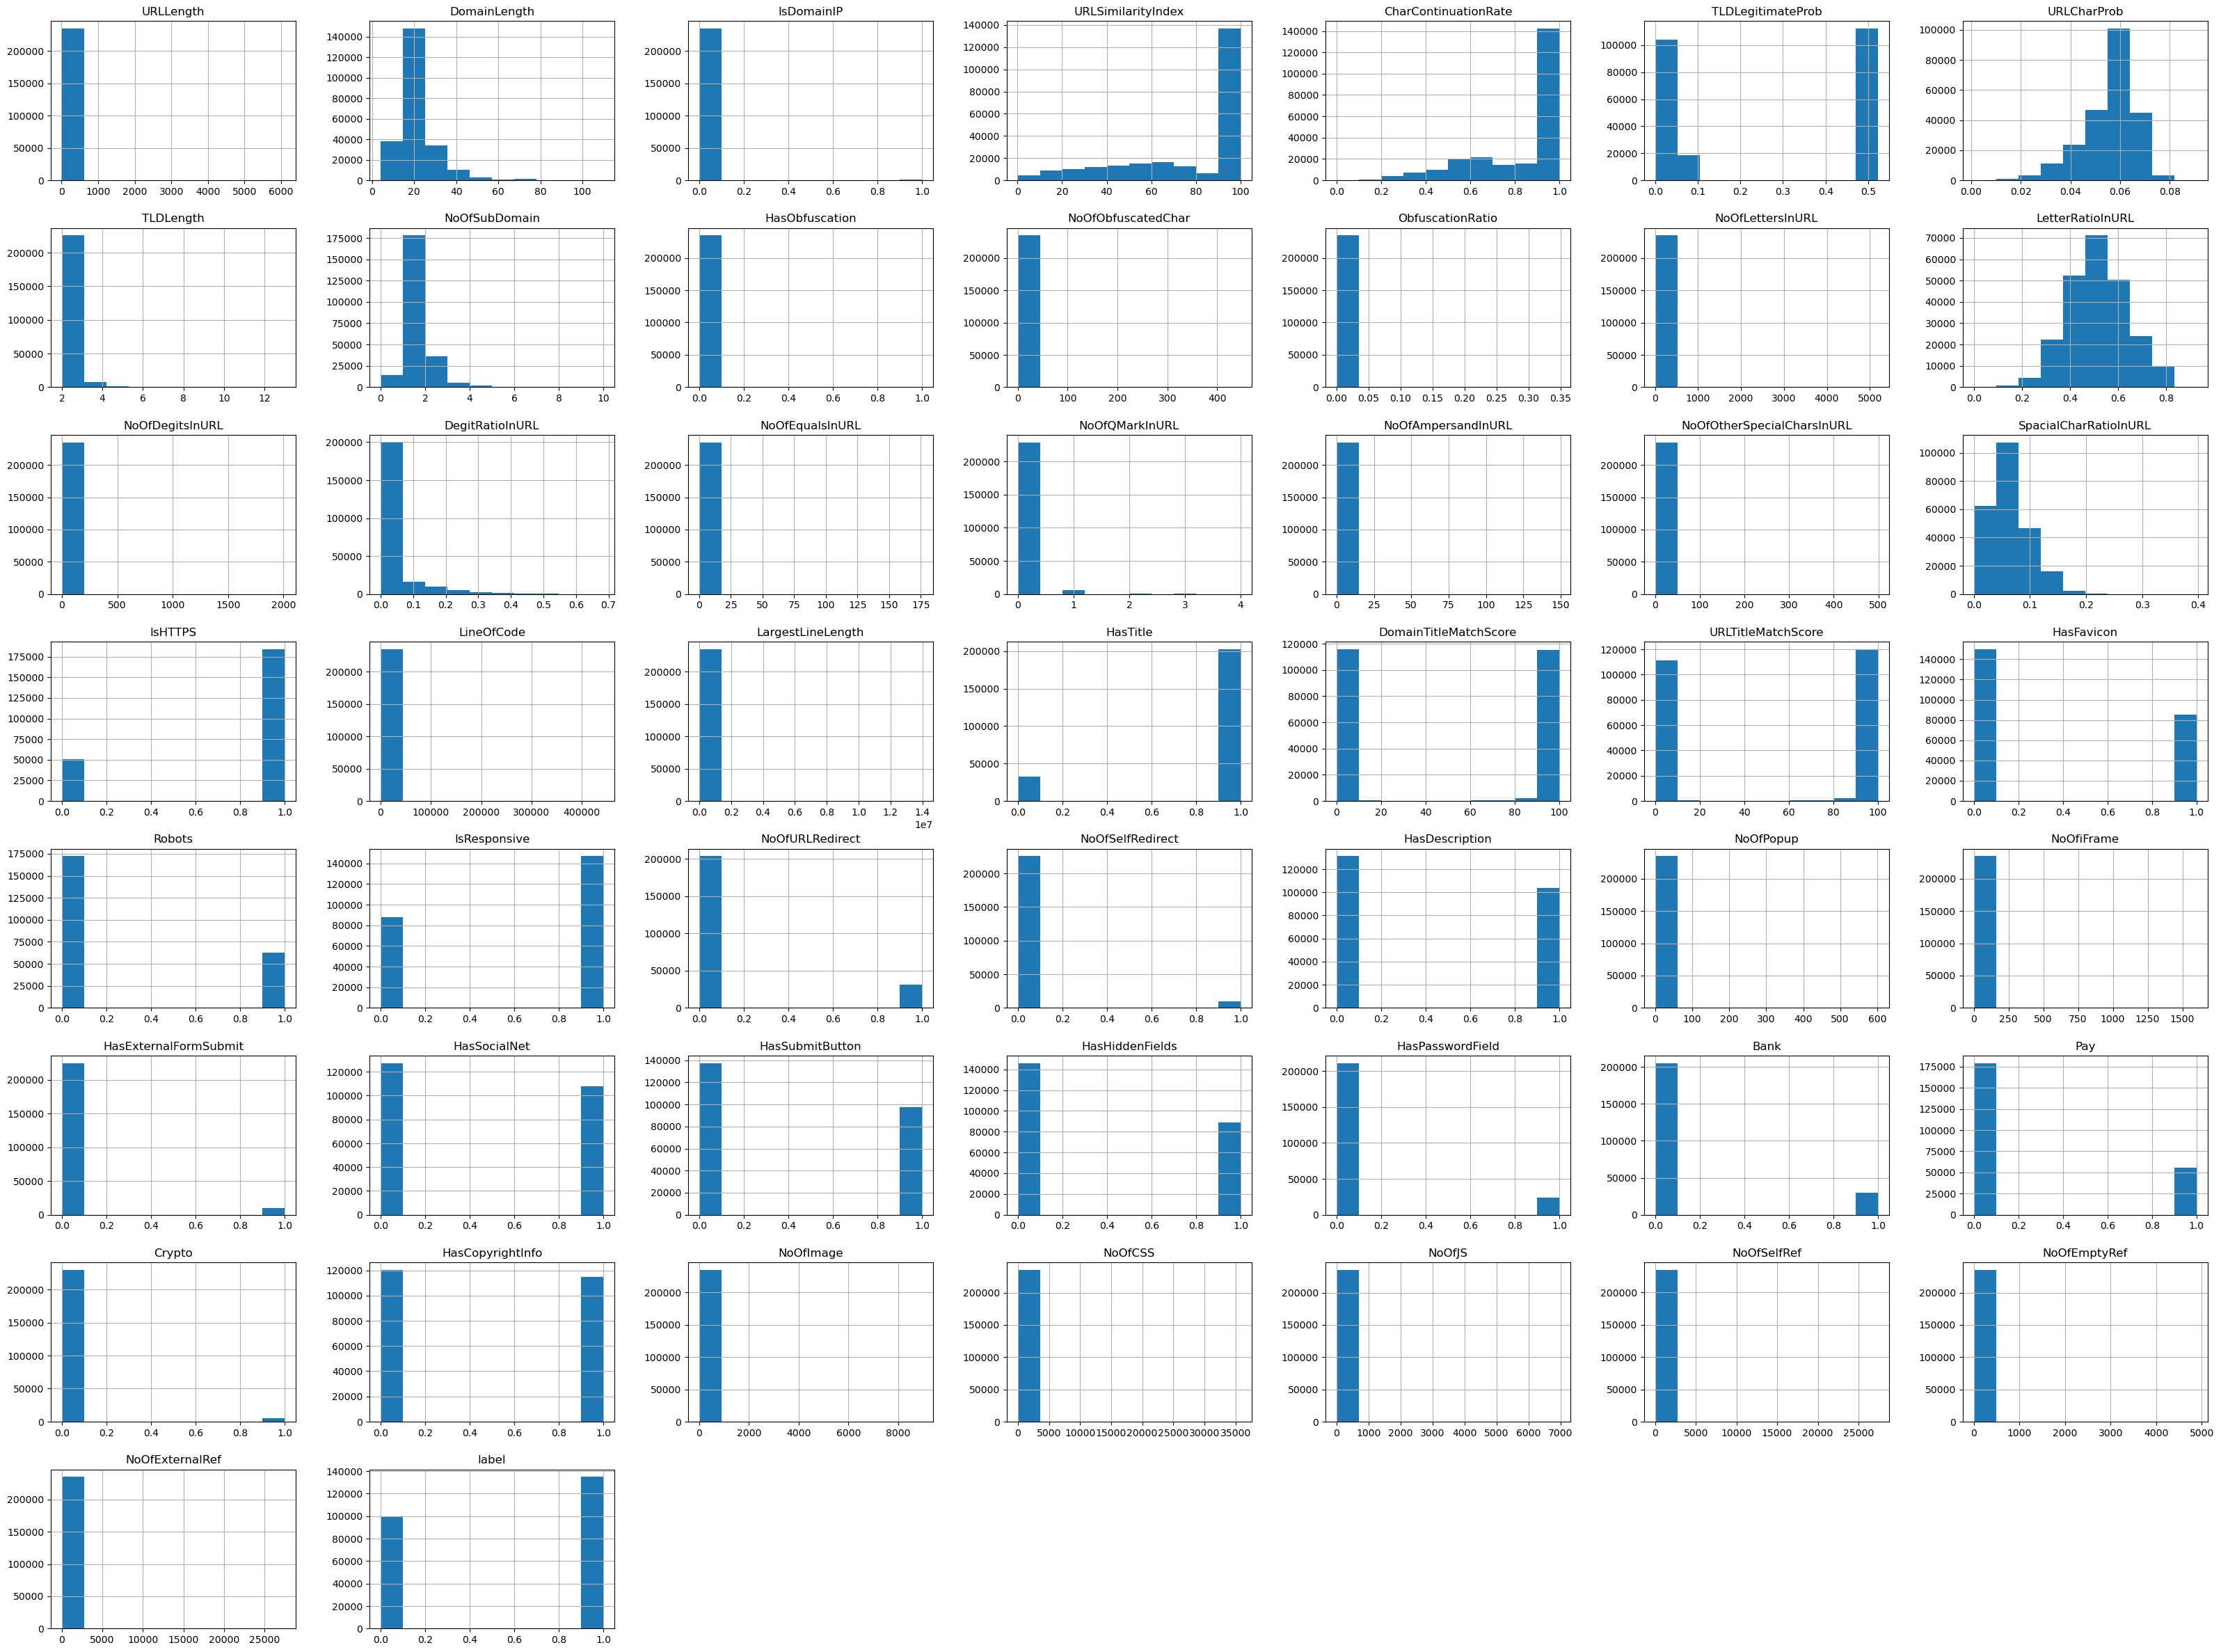

In [21]:
df.hist(figsize = (40, 30))
plt.show()

In [22]:
# Takes too much time... TBD
# df.plot(kind = 'kde', figsize = (15, 15), subplots = False)
# plt.show()

label
Legitimate URL   57.40
Phishing URL     42.60
Name: count, dtype: float64


Text(0, 0.5, 'Number of Entries')

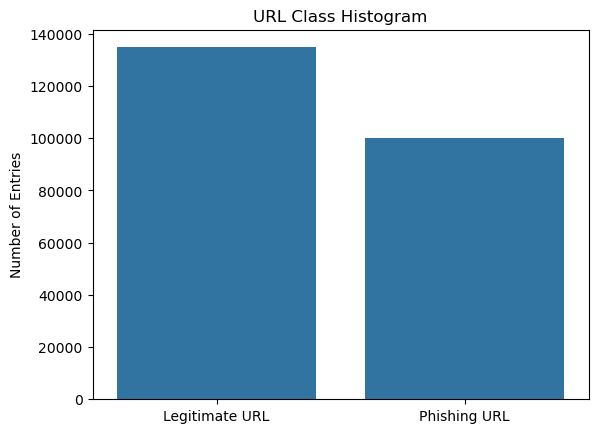

In [23]:
# Do some index shenanigans to replace 0 and 1 label integers with string labels for the plot.
label_dist = df['label'].value_counts()
label_dist.index = label_dist.index.map(url_classification_labels_map)
label_dist_percent = (label_dist / df.shape[0]).round(4).multiply(100)

print(label_dist_percent)
ax = sns.barplot(data = label_dist)
ax.set_title('URL Class Histogram')
ax.set_xlabel('')
ax.set_ylabel('Number of Entries')

The data seems reasonable balanced between URL classes. We have 57% legitimate URLs and 42% of malicious URLs.

## Bivariate Analysis - Correlation Matrix

In [24]:
cm = df.corr(numeric_only = 'True').round(3)

Text(0.5, 1.0, 'Correlation Matrix')

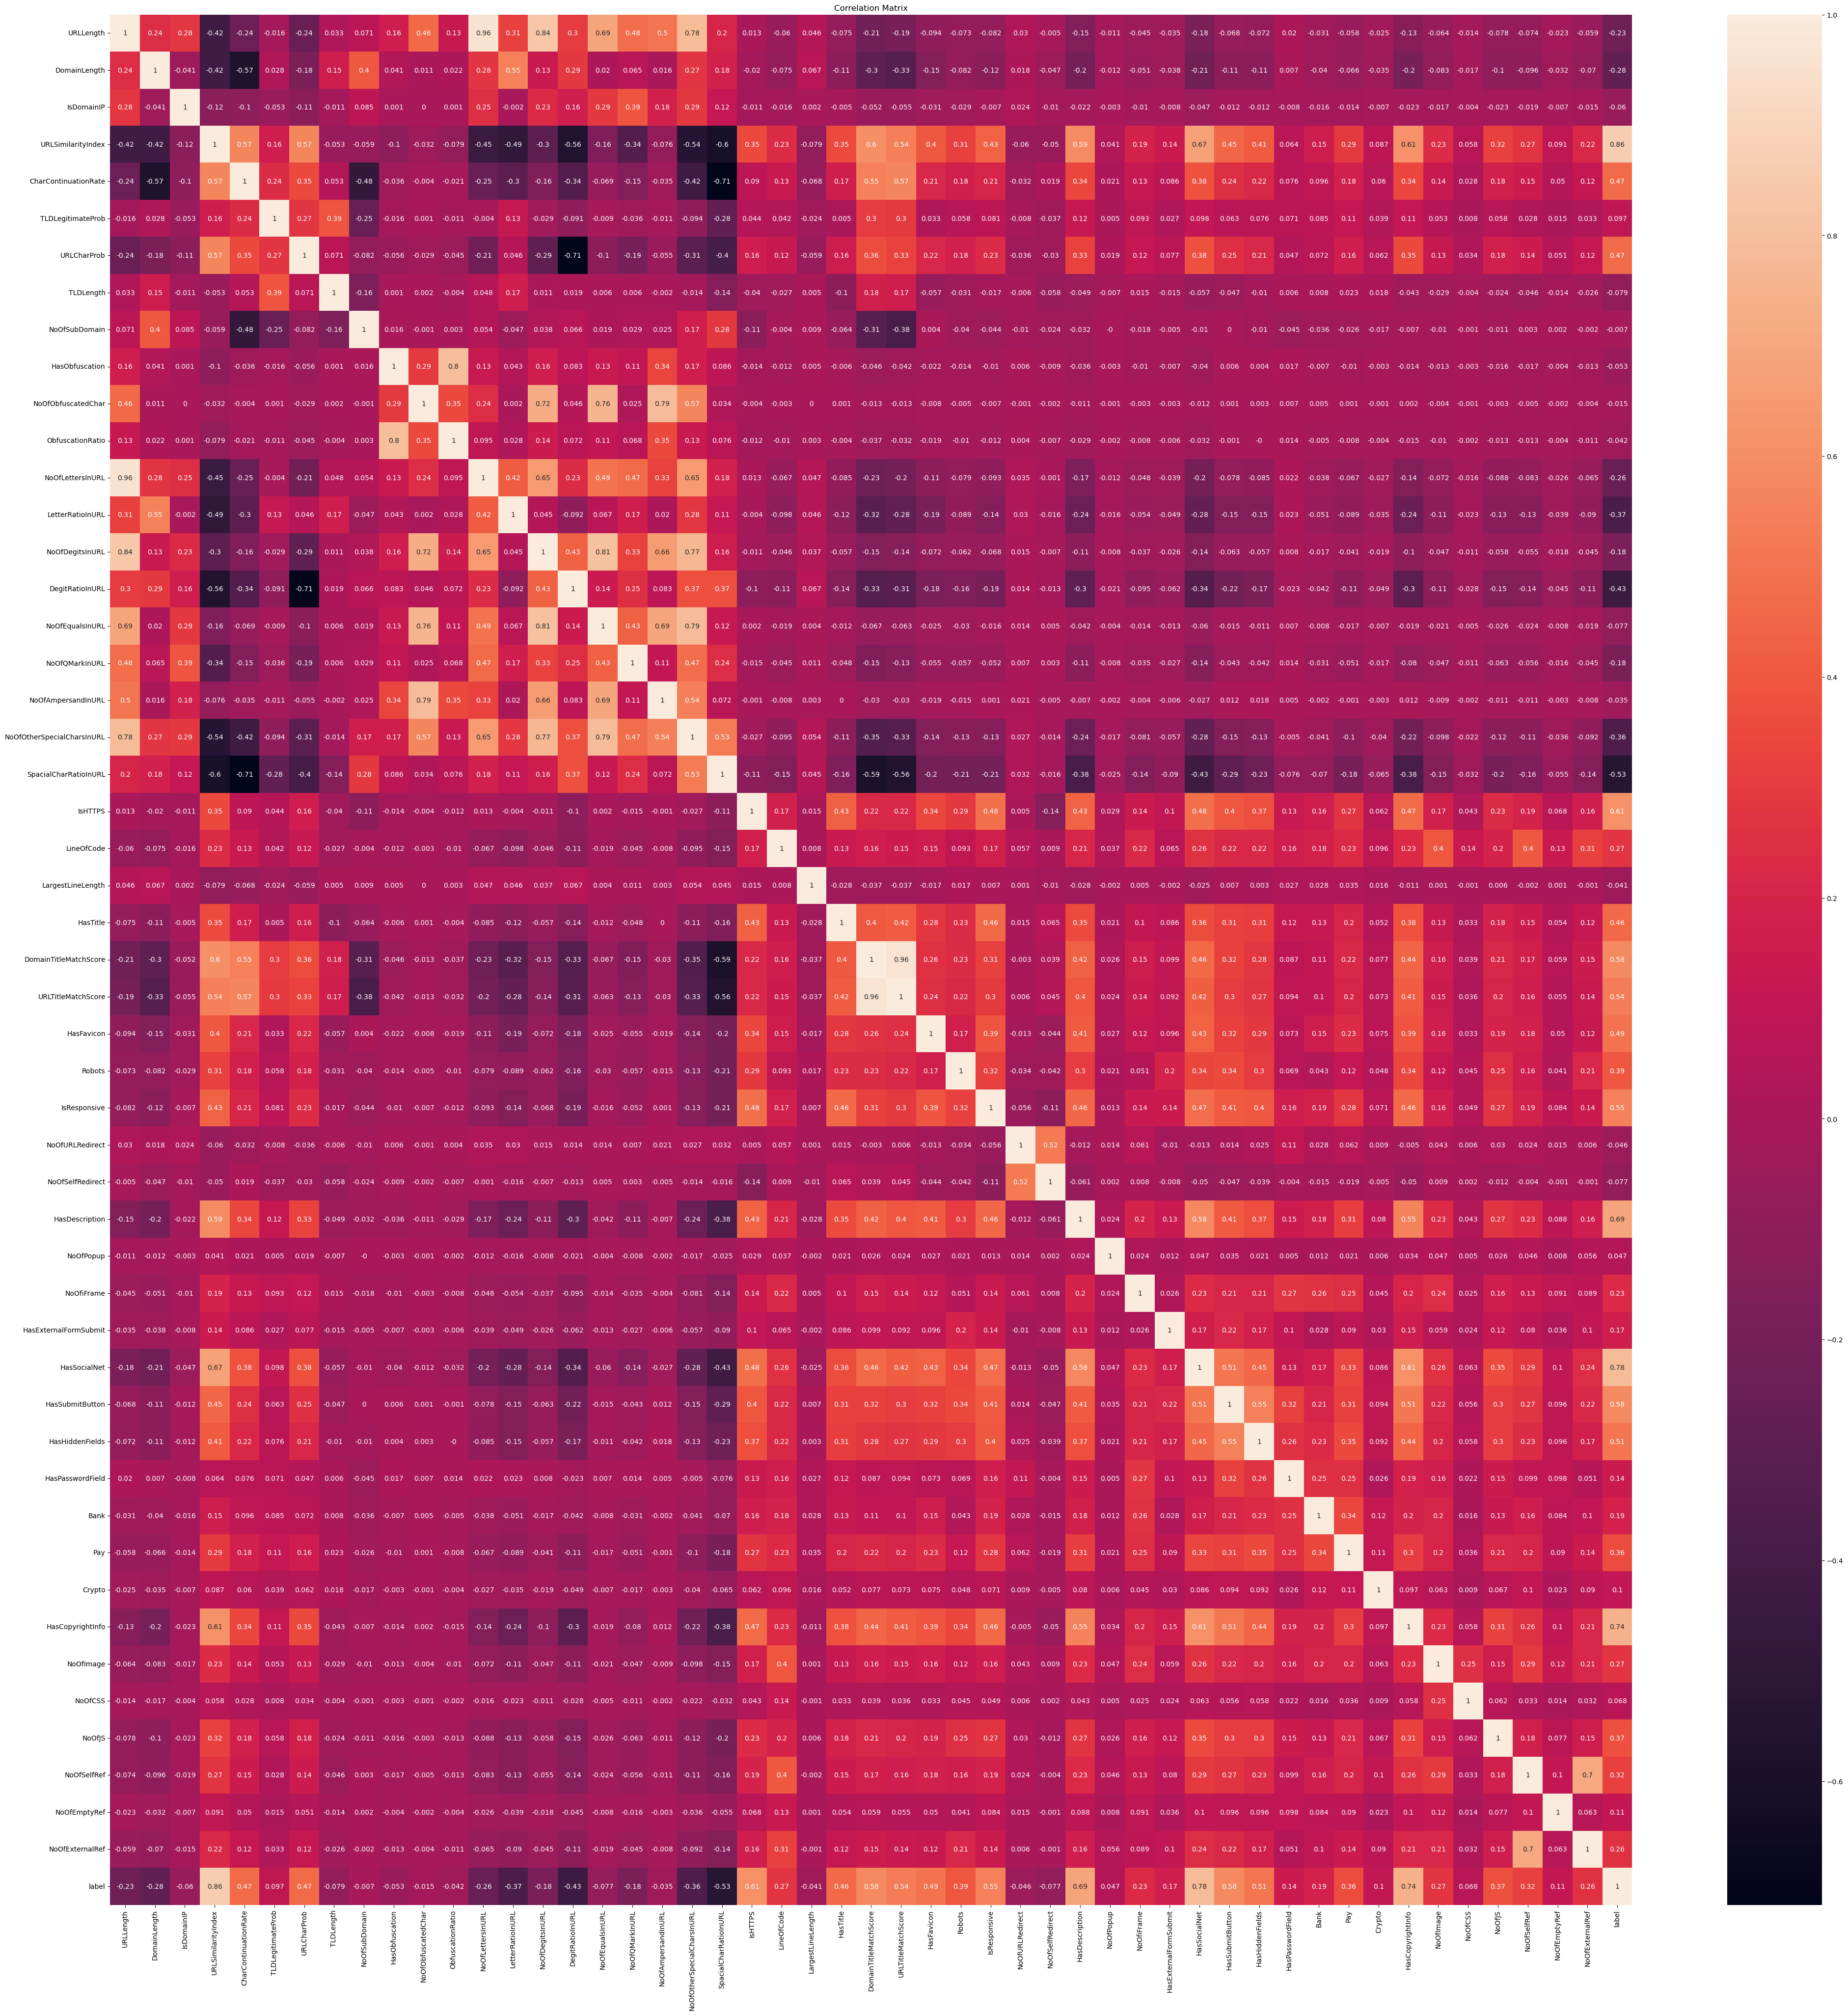

In [25]:
plt.figure(figsize = (50, 50))
ax = sns.heatmap(data = cm, annot = True,  xticklabels = True, yticklabels = True)
ax.set_title('Correlation Matrix')

In [26]:
# Get all variables correlations with the classification label and sort by their absolute value.
cm['label'].sort_values(key = np.abs, ascending = False)

label                         1.00
URLSimilarityIndex            0.86
HasSocialNet                  0.78
HasCopyrightInfo              0.74
HasDescription                0.69
IsHTTPS                       0.61
DomainTitleMatchScore         0.58
HasSubmitButton               0.58
IsResponsive                  0.55
URLTitleMatchScore            0.54
SpacialCharRatioInURL        -0.53
HasHiddenFields               0.51
HasFavicon                    0.49
URLCharProb                   0.47
CharContinuationRate          0.47
HasTitle                      0.46
DegitRatioInURL              -0.43
Robots                        0.39
NoOfJS                        0.37
LetterRatioInURL             -0.37
Pay                           0.36
NoOfOtherSpecialCharsInURL   -0.36
NoOfSelfRef                   0.32
DomainLength                 -0.28
NoOfImage                     0.27
LineOfCode                    0.27
NoOfExternalRef               0.26
NoOfLettersInURL             -0.26
URLLength           

### Correlation Matrix Findings

It looks like `URLSimilarityIndex`, `HasSocialNet`, `HasCopyrightInfo` among many others have a very strong positive correlation with the Legitimate URL class. 

Then `SpacialCharRatioInURL`, `DegitRatioInURL`, `LetterRatioInURL` have the strongest negative correlation with the Legitimate URL class, hence indicating potentially harmful URLs.


## Training and Validation

### Separation of Training and Test Data

In [27]:
# Remove the classification label and all irrelevant text columns leaving numerical data only.
X = df.drop(columns=['label', 'URL', 'Domain', 'TLD', 'Title'])

# Predict the classification label.
y = df['label']

# Stratify makes sure to balance target variable in training and test buckets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = df['label'])
y_train.value_counts()

label
1    101137
0     75071
Name: count, dtype: int64

### Create Column Normalization Transformer

This will normalize all numerical values. It is shared and used by all models trained down below. 

In [28]:
numerical_column_names = X_train.select_dtypes(include = 'number').columns
print(numerical_column_names)

transformer = make_column_transformer(
    (StandardScaler(), numerical_column_names),
    remainder = 'drop'
)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


### Dummy Classifier Model

Fit a Dummy Classifier for baseline to compare performance of other models to.

In [29]:
dummy_pipe = Pipeline([
    ('transform', transformer), 
    ('dummy', DummyClassifier()),
])
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfD...
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object'))])),
                ('dummy', DummyClassifier())])

In [30]:
dummy_pipe.score(X_train, y_train)

0.5739637246890039

In [31]:
dummy_pipe.score(X_test, y_test)

0.5739653029606552

In [32]:
y_pred_test = dummy_pipe.predict(X_test)

In [33]:
# Use `zero_division = 0.0`` to suppress warnings of division by zero due to Dummy Classifier's inner-working. 
report = classification_report(y_test, y_pred_test, target_names = url_classification_labels_list, output_dict = True, zero_division = 0.0)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,0.00,0.57,0.57,0.29,0.33
recall,0.00,1.00,0.57,0.50,0.57
f1-score,0.00,0.73,0.57,0.36,0.42
support,25024.00,33713.00,0.57,58737.00,58737.00


We have a baseline score of `0.57` with `DummyClassifier`.

### Train KNeighborsClassifier Model

In [34]:
knn_pipe = Pipeline([
    ('transform', transformer), 
    ('knn', KNeighborsClassifier()),
])

In [35]:
param_grid = {
    'knn__n_neighbors': [1, 2, 5],
    'knn__weights': ['uniform', 'distance'],
}

cv_search = GridSearchCV(knn_pipe, param_grid, n_jobs = -1)
cv_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'L...
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object'))])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 5],
                         'knn__weights': ['uniform', 'distance']})

In [36]:
cv_search.best_params_

{'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [37]:
cv_search.score(X_test, y_test)

0.9987741968435568

In [38]:
y_pred_test = cv_search.predict(X_test)

In [39]:
report = classification_report(y_test, y_pred_test, digits = 8, target_names = url_classification_labels_list, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,1.00,1.00,1.00,1.00,1.00
recall,1.00,1.00,1.00,1.00,1.00
f1-score,1.00,1.00,1.00,1.00,1.00
support,25024.00,33713.00,1.00,58737.00,58737.00


Text(0.5, 1.0, 'KNeighborsClassifier Confusion Matrix')

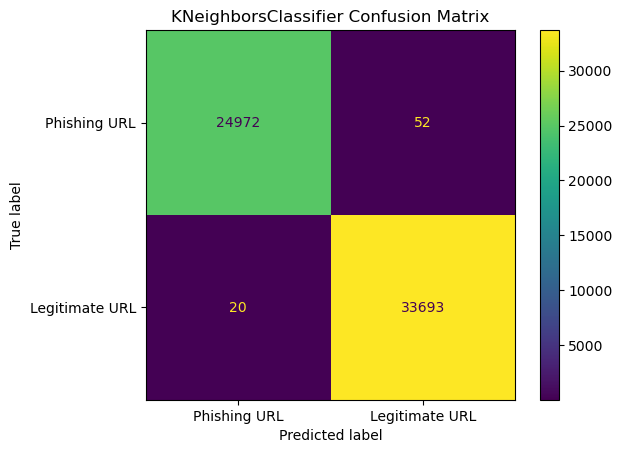

In [40]:
conf_m = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = url_classification_labels_list)
disp.plot()
disp.ax_.set_title('KNeighborsClassifier Confusion Matrix')

### Train LogisticRegression Model

In [41]:
lr_pipe = Pipeline([
    ('transform', transformer), 
    ('lr', LogisticRegression()),
])

In [42]:
param_grid = {
    'lr__C': np.logspace(-2.0, 2.0, 20),
}

cv_search = GridSearchCV(lr_pipe, param_grid, n_jobs = -1)
cv_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'L...
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])})

In [43]:
cv_search.best_params_

{'lr__C': 1.2742749857031335}

#### Extract LogisticRegression Coefficients

Coefficients: [[ 0.055958    1.14847592 -0.01542379  7.03734007 -0.64066825 -0.34134017
   0.19273115 -0.15594487  1.20451541 -0.10233078 -0.01248414 -0.06131509
  -0.28620602 -1.75636898 -0.26505553 -1.18409085 -0.0112975  -0.00991478
  -0.01520752 -0.68113401 -1.8637112   3.97296268  1.16041255 -0.95760776
   0.91946388  0.32904712  0.00968143  0.49495067  0.19102307  0.21020255
  -0.16137241  0.2899631   0.85584563  0.27718198  0.39786649 -0.34390928
   1.4793118   0.37380046  0.40050198  0.08386564  0.05880787  0.2700471
  -0.07554564  0.93520109  1.32911226  0.32510141  1.56795634  1.61813465
   0.35110043  1.38560172]]
Intercept: [0.02444811]


Text(0, 0.5, 'Feature Name')

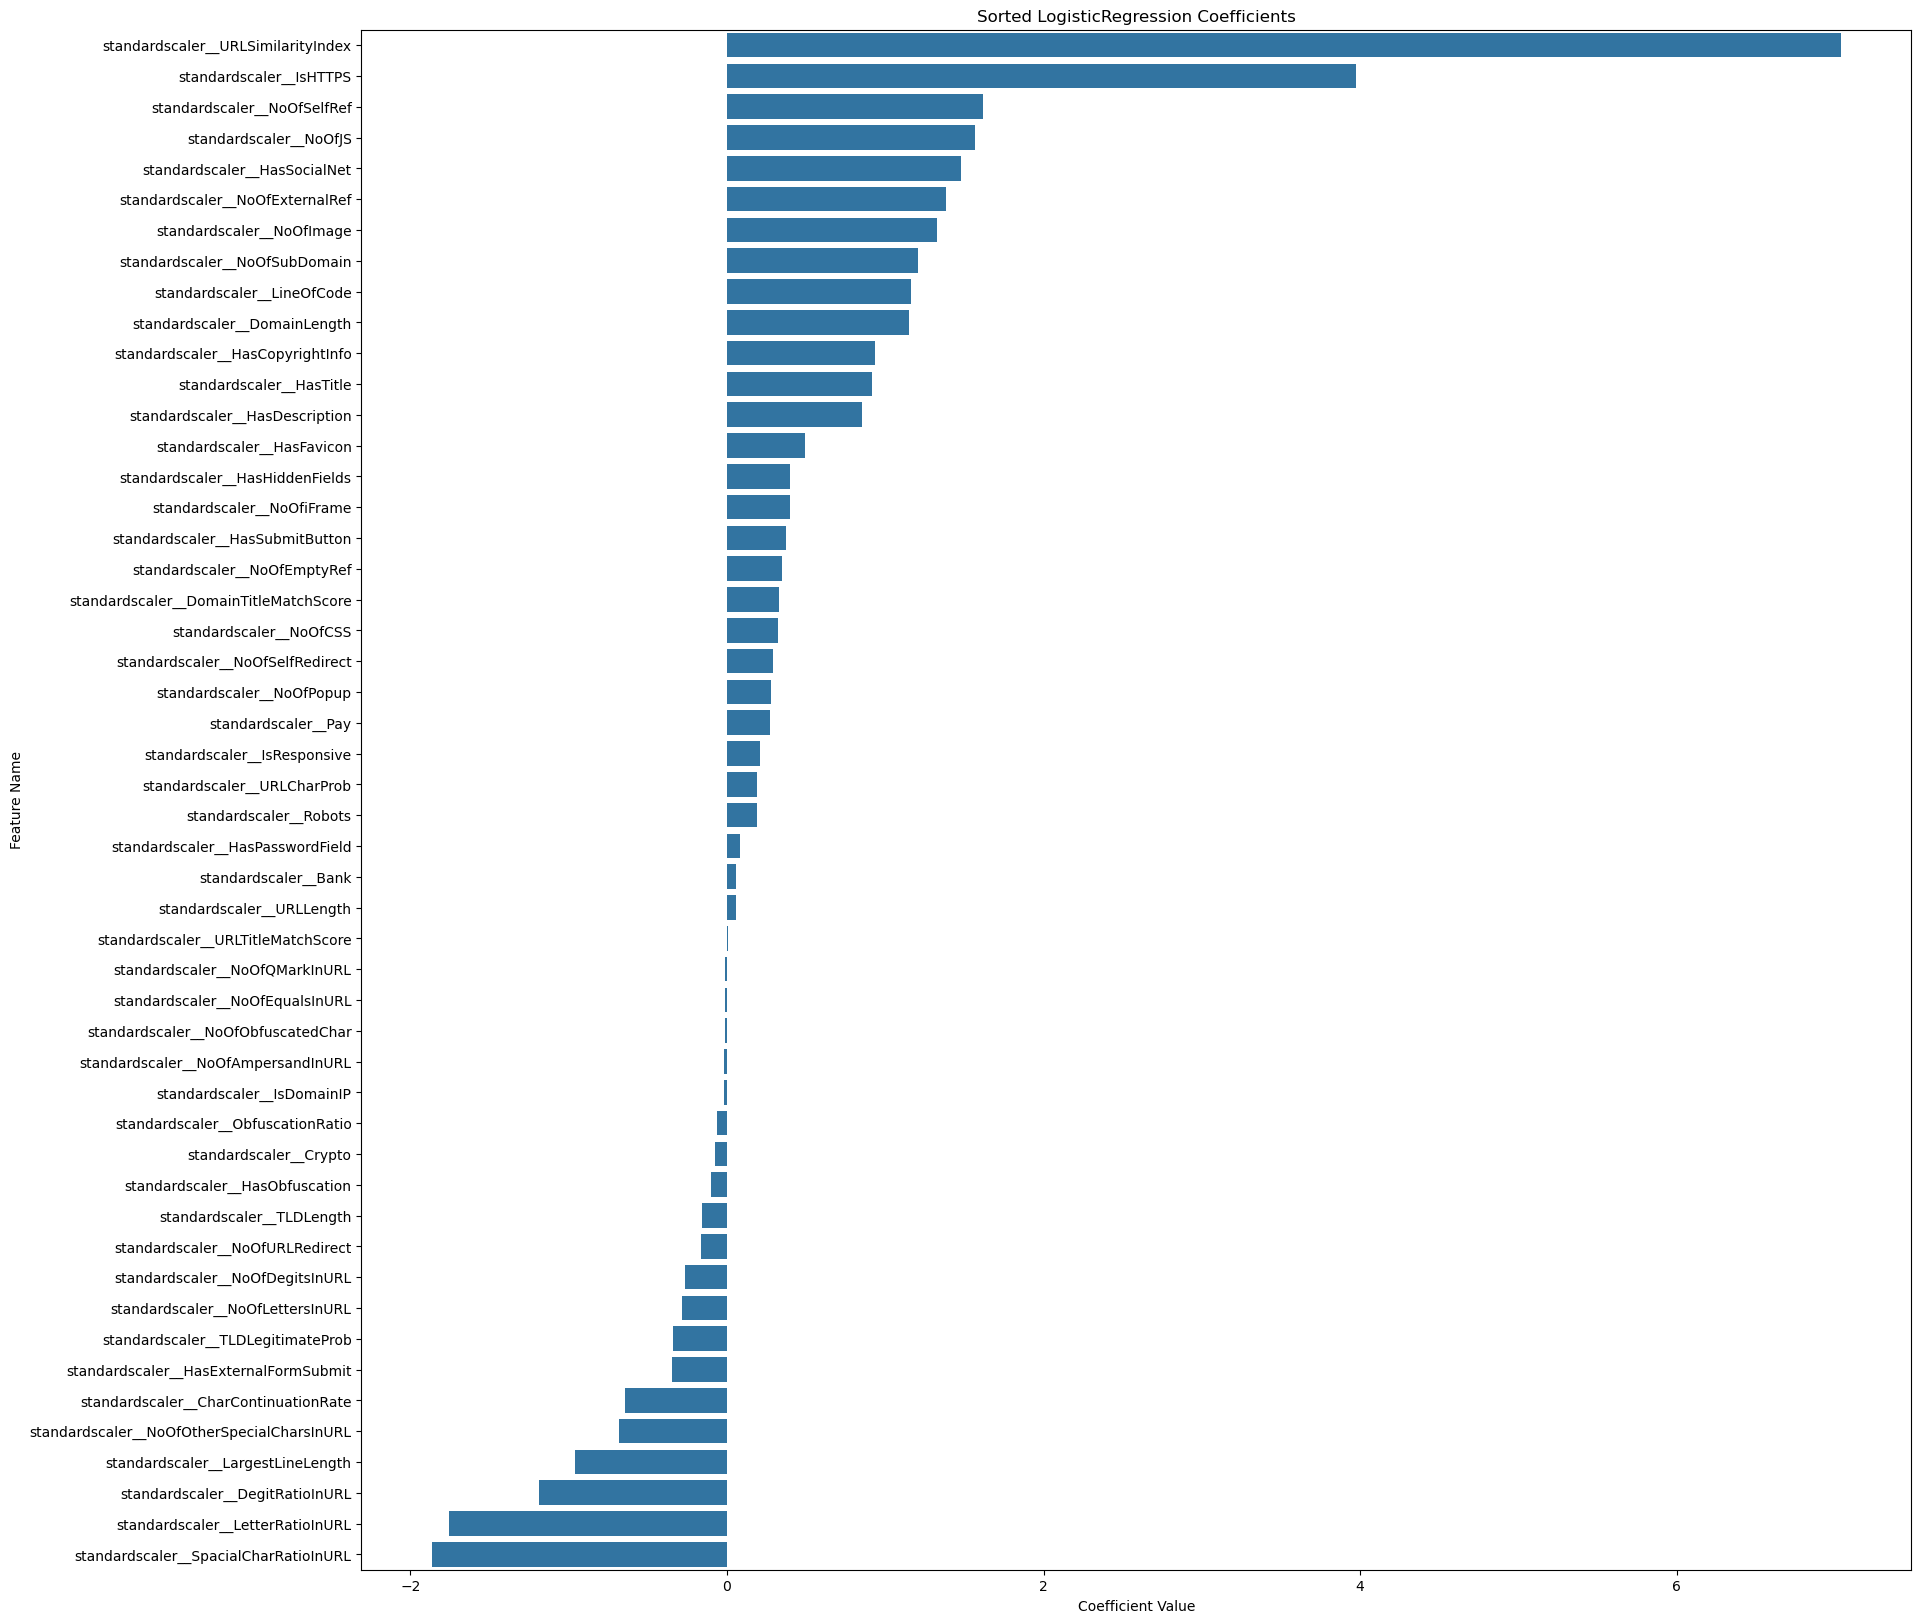

In [44]:
lr = cv_search.best_estimator_.named_steps['lr']
coefficients = lr.coef_
intercept = lr.intercept_
feature_names = transformer.get_feature_names_out()
print("Coefficients:", coefficients)
print("Intercept:", intercept)

coefficients_df = pd.DataFrame(coefficients, columns = feature_names)
coefficients_df = coefficients_df.T.sort_values(by = 0, ascending = False)
coefficients_df

plt.figure(figsize = (20, 20))
ax = sns.barplot(data = coefficients_df, y = coefficients_df.index, x = 0)
ax.set_title('Sorted LogisticRegression Coefficients')
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature Name')

You can see some similarities between Logistic Regression's coefficients and previously generated Correlation Matrix.

In [45]:
cv_search.score(X_test, y_test)

0.999897849736963

In [46]:
y_pred_test = cv_search.predict(X_test)

In [47]:
report = classification_report(y_test, y_pred_test, target_names = url_classification_labels_list, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,1.00,1.00,1.00,1.00,1.00
recall,1.00,1.00,1.00,1.00,1.00
f1-score,1.00,1.00,1.00,1.00,1.00
support,25024.00,33713.00,1.00,58737.00,58737.00


Text(0.5, 1.0, 'LogisticRegression Confusion Matrix')

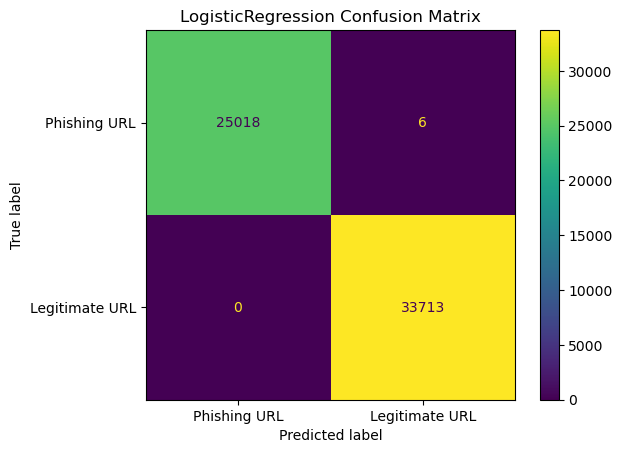

In [48]:
conf_m = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = url_classification_labels_list)
disp.plot()
disp.ax_.set_title('LogisticRegression Confusion Matrix')

### Train DecisionTreeClassifier Model

In [49]:
dt_pipe = Pipeline([
    ('transform', transformer), 
    ('dt', DecisionTreeClassifier()),
])

In [50]:
param_grid = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': [1, 2, 5, 10, 50, 100],
    'dt__min_samples_leaf': range(1, 5),
}

cv_search = GridSearchCV(dt_pipe, param_grid, n_jobs = -1)
cv_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'L...
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object'))])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [1, 2, 5, 10, 50, 100],
                         'dt__min_samples_leaf': range(1, 5)})

In [51]:
cv_search.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 1}

In [52]:
cv_search.score(X_test, y_test)

1.0

In [53]:
y_pred_test = cv_search.predict(X_test)

In [54]:
report = classification_report(y_test, y_pred_test, target_names = url_classification_labels_list, output_dict = True)
report_df = pd.DataFrame(report)
report_df

,Phishing URL,Legitimate URL,accuracy,macro avg,weighted avg
precision,1.00,1.00,1.00,1.00,1.00
recall,1.00,1.00,1.00,1.00,1.00
f1-score,1.00,1.00,1.00,1.00,1.00
support,25024.00,33713.00,1.00,58737.00,58737.00


Text(0.5, 1.0, 'DecisionTreeClassifier Confusion Matrix')

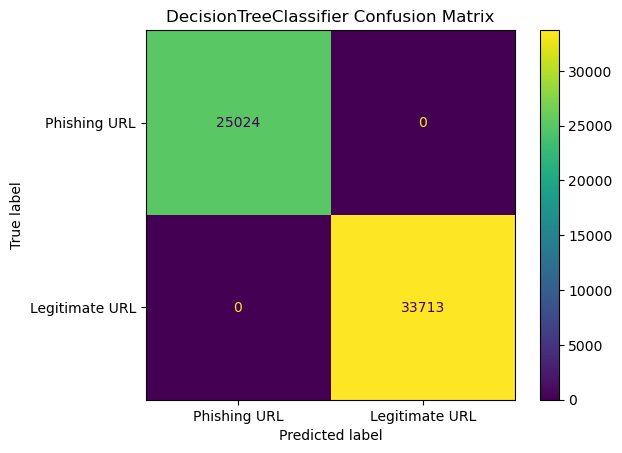

In [55]:
conf_m = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = url_classification_labels_list)
disp.plot()
disp.ax_.set_title('DecisionTreeClassifier Confusion Matrix')

# Next Steps
- Try more classification models.
- Training and prediction runtime and memory profiling.
- Recalculate all data for duplicated URL entries from existing intermediate data, like `URLLength`, etc.